In [1]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.
Training XGBoost model...
Evaluating model...
Training Accuracy: 1.00
Testing Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99      1000
     Class 1       0.99      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
[[995   5]
 [ 11 989]]


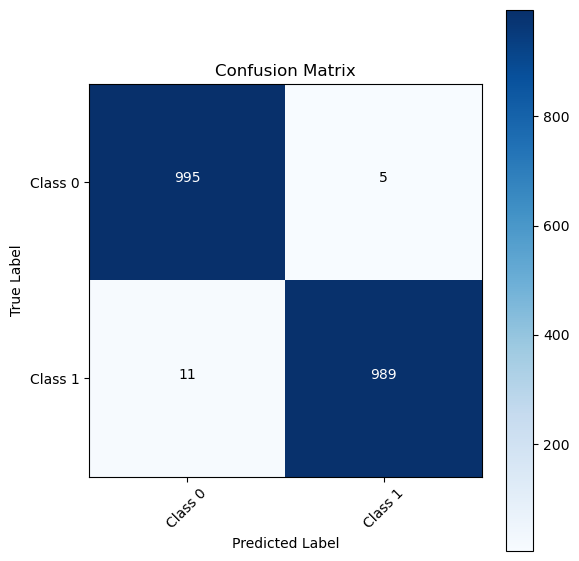

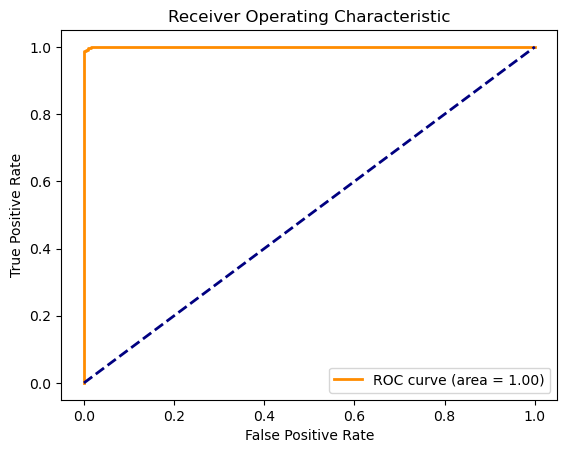

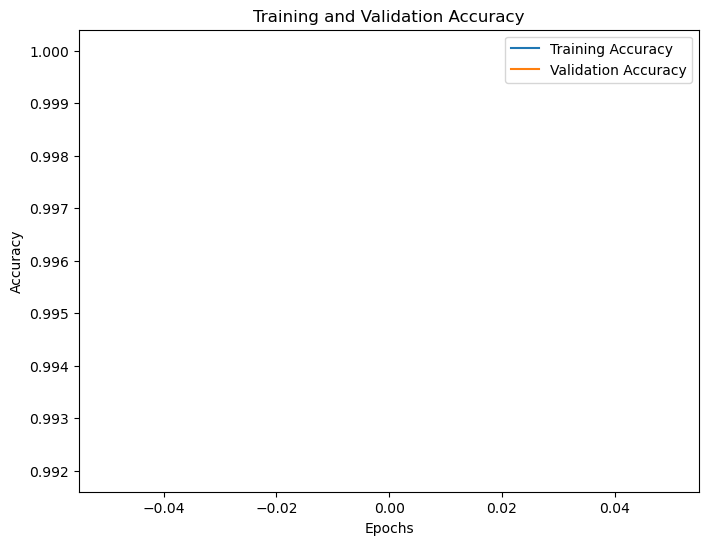

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the dataset
train_dir = "C:/Users/server4/Desktop/train"
test_dir = "C:/Users/server4/Desktop/test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32
epochs = 10

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Flatten the images for the XGBoost model (required for tabular data)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Normalize the data (scaling pixel values between 0 and 1)
X_train_scaled = X_train_flat / 255.0
X_test_scaled = X_test_flat / 255.0

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train an XGBoost model
print("Training XGBoost model...")
xgb_model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train_encoded)

# Make predictions
print("Evaluating model...")
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

# Calculate probabilities for ROC AUC
y_test_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report:")
class_names = ['Class 0', 'Class 1']  # Replace with actual class names
print(classification_report(y_test_encoded, y_test_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

plot_confusion_matrix(cm, classes=class_names)
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Plot training & validation accuracy and loss (For XGBoost, this is not directly applicable, but we can plot training accuracy)

# Plot training accuracy
plt.figure(figsize=(8, 6))
plt.plot(xgb_model.score(X_train_scaled, y_train_encoded), label='Training Accuracy')
plt.plot(xgb_model.score(X_test_scaled, y_test_encoded), label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [2]:
import joblib

# Assuming `xgb_model` is your trained XGBoost model
joblib.dump(xgb_model, 'xgboost_model.pkl')
print("XGBoost model saved as 'xgboost_model.pkl'")


XGBoost model saved as 'xgboost_model.pkl'


In [3]:
# Load the saved XGBoost model
xgb_model = joblib.load('xgboost_model.pkl')
print("XGBoost model loaded successfully!")


XGBoost model loaded successfully!


Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.


C:\Users\server4\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.8833 - loss: 0.2664 - val_accuracy: 0.9965 - val_loss: 0.0098
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9943 - loss: 0.0202 - val_accuracy: 0.9970 - val_loss: 0.0082
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9992 - loss: 0.0033 - val_accuracy: 0.9965 - val_loss: 0.0071
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9987 - loss: 0.0054 - val_accuracy: 0.9980 - val_loss: 0.0063
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9994 - loss: 0.0012 - val_accuracy: 0.9915 - val_loss: 0.0191
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9977 - loss: 0.0068 - val_accuracy: 0.9910 - val_loss: 0.0250
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9985 - loss: 0.0035 - val_accuracy: 0.9970 - val_loss: 0.0168
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9982 - loss: 0.0066 - val_accu

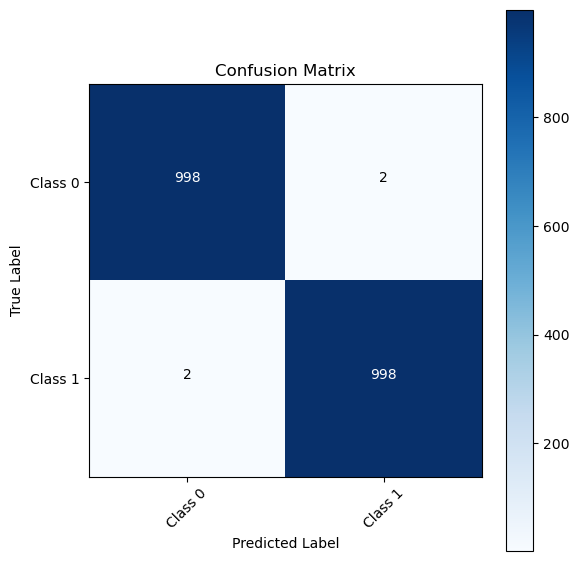

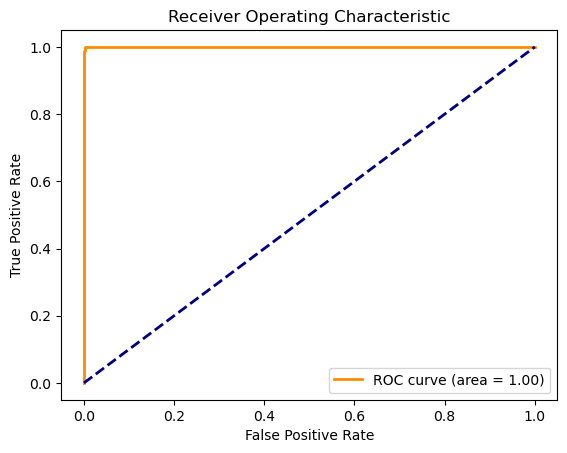

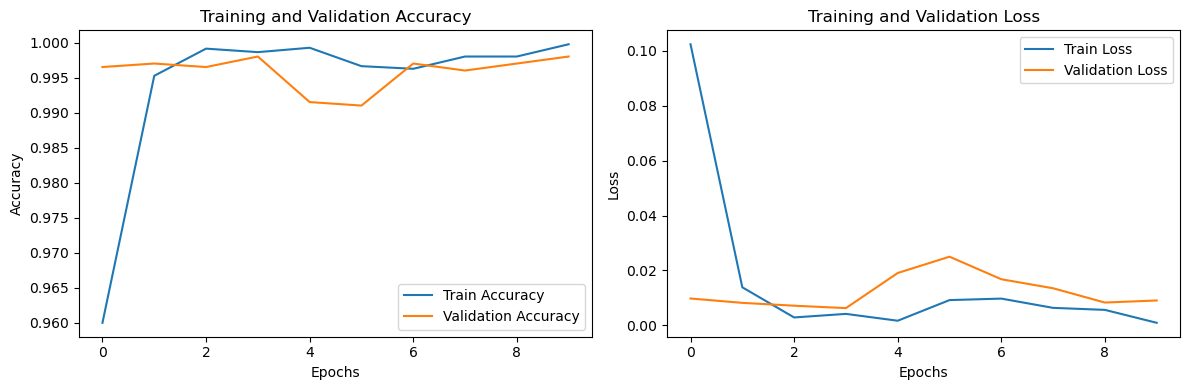

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

# Paths to the dataset
train_dir ="C:/Users/server4/Desktop/train"
test_dir = "C:/Users/server4/Desktop/test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32
epochs = 10

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Normalize the images (scaling pixel values between 0 and 1)
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# Build a simple CNN model (for example, a 2-layer CNN with pooling)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for 10 epochs
history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_scaled, y_test))

# Metrics
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Convert predictions to binary values
y_train_pred_binary = (y_train_pred > 0.5).astype(int)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Classification report
class_names = ['Class 0', 'Class 1']  # Replace with actual class names
print("Classification Report:")
print(classification_report(y_test, y_test_pred_binary, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_binary)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

plot_confusion_matrix(cm, classes=class_names)
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
# Save the entire model
model.save('cnn_model.h5')
print("CNN model saved as 'cnn_model.h5'")


CNN model saved as 'cnn_model.h5'


In [18]:
from tensorflow.keras.models import load_model

# Load the entire model
cnn_model = load_model('cnn_model.h5')
print("CNN model loaded successfully!")


CNN model loaded successfully!


Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.


C:\Users\server4\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7995 - loss: 0.9472 - val_accuracy: 0.9540 - val_loss: 0.1266
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9512 - loss: 0.1355 - val_accuracy: 0.9720 - val_loss: 0.0766
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9767 - loss: 0.0696 - val_accuracy: 0.9730 - val_loss: 0.0790
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9787 - loss: 0.0631 - val_accuracy: 0.9810 - val_loss: 0.0592
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9750 - loss: 0.0750 - val_accuracy: 0.9760 - val_loss: 0.0581
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9862 - loss: 0.0373 - val_accuracy: 0.9845 - val_loss: 0.0437
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9860 - loss: 0.0372 - val_accuracy: 0.9615 - val_loss: 0.1336
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9790 - loss: 0.0578 - val_accu

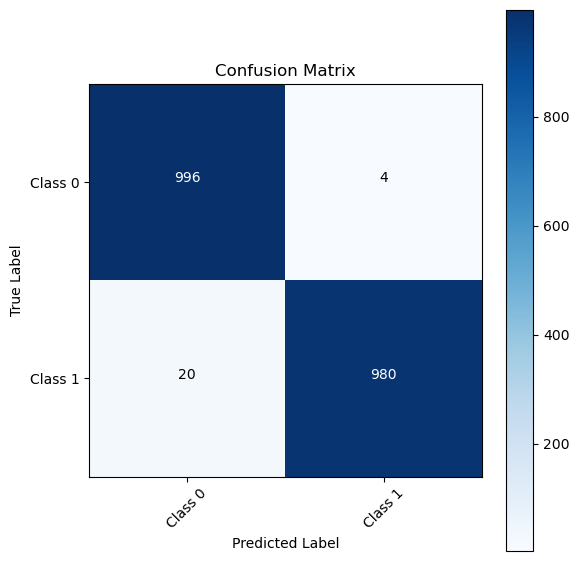

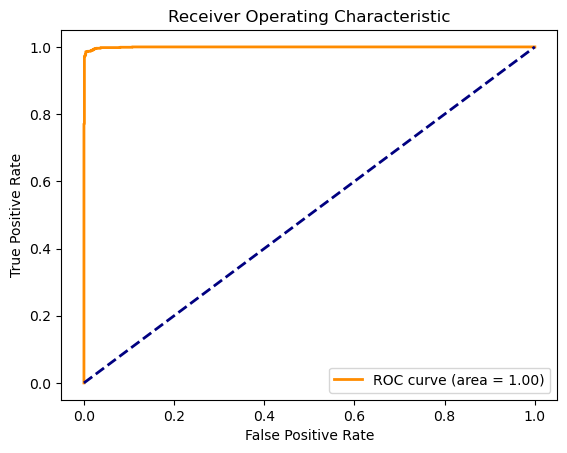

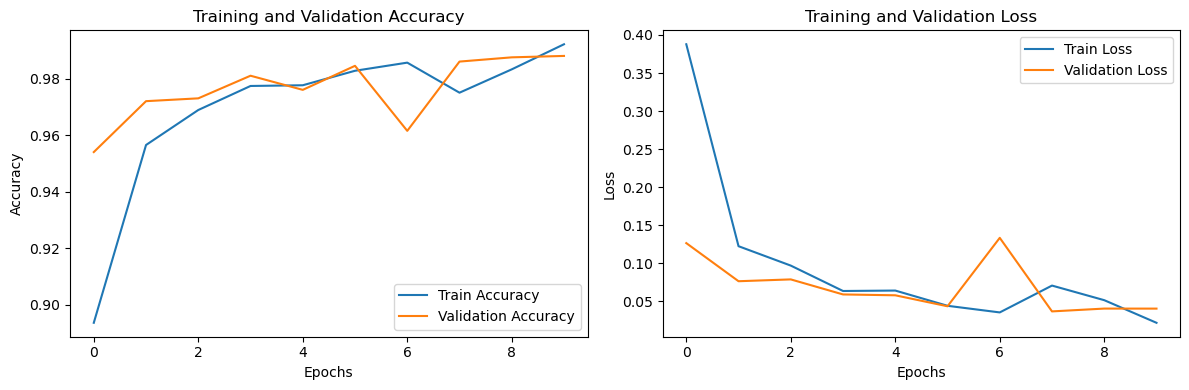

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

# Paths to the dataset
train_dir = "C:/Users/server4/Desktop/train"
test_dir = "C:/Users/server4/Desktop/test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32
epochs = 10

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Normalize the images (scaling pixel values between 0 and 1)
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# Flatten the images to a vector for DNN
X_train_flat = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_test_flat = X_test_scaled.reshape(X_test_scaled.shape[0], -1)

# Build a simple DNN model (fully connected layers)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_flat.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for 10 epochs
history = model.fit(X_train_flat, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_flat, y_test))

# Metrics
y_train_pred = model.predict(X_train_flat)
y_test_pred = model.predict(X_test_flat)

# Convert predictions to binary values
y_train_pred_binary = (y_train_pred > 0.5).astype(int)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Classification report
class_names = ['Class 0', 'Class 1']  # Replace with actual class names
print("Classification Report:")
print(classification_report(y_test, y_test_pred_binary, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_binary)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

plot_confusion_matrix(cm, classes=class_names)
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [26]:
# Save the entire model
model.save('dnn_model.h5')
print("DNN model saved as 'dnn_model.h5'")






DNN model saved as 'dnn_model.h5'


In [28]:
from tensorflow.keras.models import load_model

# Load the saved model
dnn_model = load_model('dnn_model.h5')
print("DNN model loaded successfully!")


DNN model loaded successfully!


Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.
Training Random Forest model...
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99      1000
     Class 1       0.99      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
[[994   6]
 [ 14 986]]


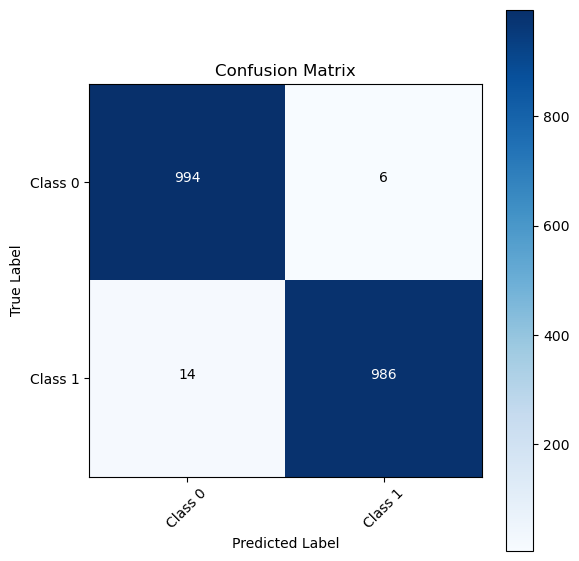

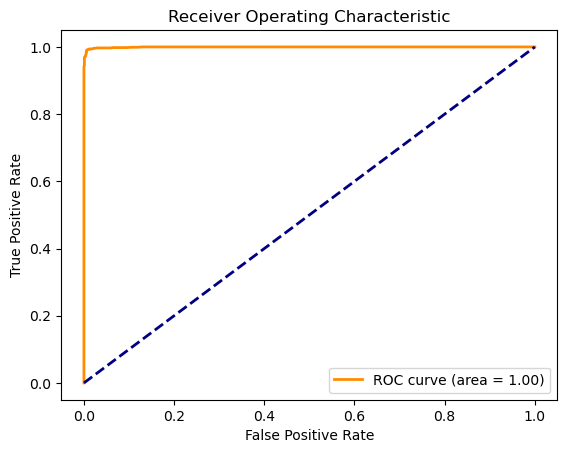

Training Accuracy: 1.00
Testing Accuracy: 0.99


In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the dataset
train_dir = "C:/Users/server4/Desktop/train"
test_dir = "C:/Users/server4/Desktop/test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Normalize the images (scaling pixel values between 0 and 1)
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# Flatten the images to a vector for Random Forest
X_train_flat = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_test_flat = X_test_scaled.reshape(X_test_scaled.shape[0], -1)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
print("Training Random Forest model...")
rf_model.fit(X_train_flat, y_train)

# Metrics
y_train_pred = rf_model.predict(X_train_flat)
y_test_pred = rf_model.predict(X_test_flat)

# Classification report
class_names = ['Class 0', 'Class 1']  # Replace with actual class names
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

plot_confusion_matrix(cm, classes=class_names)
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test_flat)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Plot training & testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")



In [31]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Random Forest model saved as 'random_forest_model.pkl'")


Random Forest model saved as 'random_forest_model.pkl'


In [32]:
# Load the saved Random Forest model
rf_model = joblib.load('random_forest_model.pkl')
print("Random Forest model loaded successfully!")


Random Forest model loaded successfully!


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

# Paths to the dataset
train_dir = "C:/Users/server4/Desktop/train"
test_dir = "C:/Users/server4/Desktop/test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32
epochs = 10

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Normalize the data (scaling pixel values between 0 and 1)
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Build the DenseNet model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
base_model.trainable = False

# Build the classifier model on top of DenseNet
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the DenseNet model
print("Training DenseNet model...")
history = model.fit(X_train_scaled, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_data=(X_test_scaled, y_test_encoded))

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Convert predictions to binary values
y_train_pred_binary = (y_train_pred > 0.5).astype(int)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Metrics
train_accuracy = accuracy_score(y_train_encoded, y_train_pred_binary)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred_binary)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report:")
class_names = ['Class 0', 'Class 1']  # Replace with actual class names
print(classification_report(y_test_encoded, y_test_pred_binary, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_test_pred_binary)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

plot_confusion_matrix(cm, classes=class_names)
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.
Training DenseNet model...
Epoch 1/10
 32/250 ━━━━━━━━━━━━━━━━━━━━ 10:45 3s/step - accuracy: 0.7944 - loss: 0.4259

Loading training data...
Found 8000 images belonging to 2 classes.
Loading testing data...
Found 2000 images belonging to 2 classes.
Training InceptionV3 model...
Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 149ms/step - accuracy: 0.8515 - loss: 0.3323 - val_accuracy: 0.8910 - val_loss: 0.2675
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 139ms/step - accuracy: 0.9352 - loss: 0.1661 - val_accuracy: 0.9190 - val_loss: 0.2077
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 36s 144ms/step - accuracy: 0.9521 - loss: 0.1178 - val_accuracy: 0.9250 - val_loss: 0.1908
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 139ms/step - accuracy: 0.9559 - loss: 0.1138 - val_accuracy: 0.9295 - val_loss: 0.2007
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 36s 145ms/step - accuracy: 0.9639 - loss: 0.0902 - val_accuracy: 0.9260 - val_loss: 0.2158
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 36s 146ms/step - accuracy: 0.9700 - loss: 0.0778 - val_accuracy: 0.9240 - val_loss: 0.2134
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 141ms/s

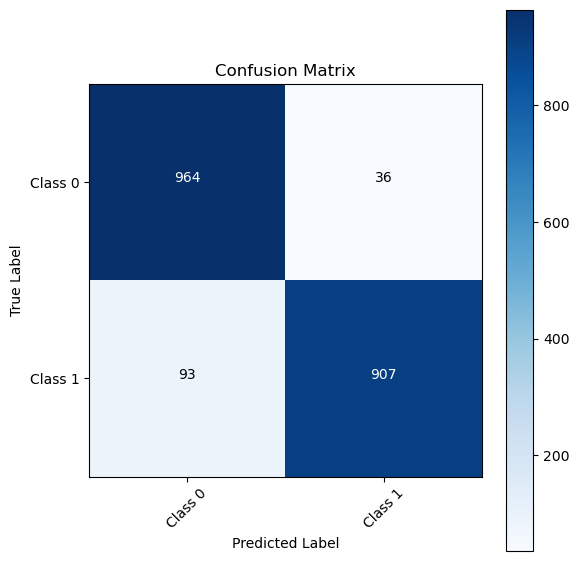

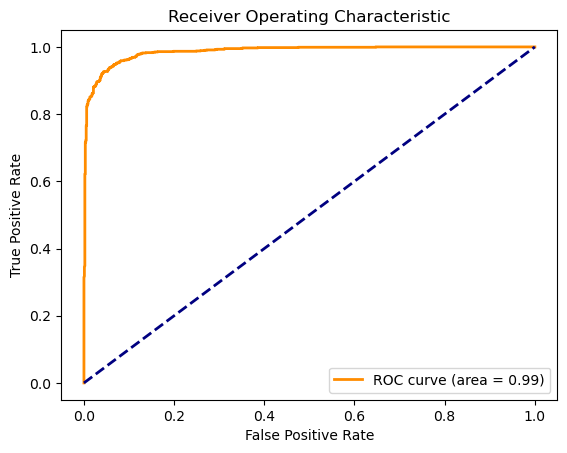

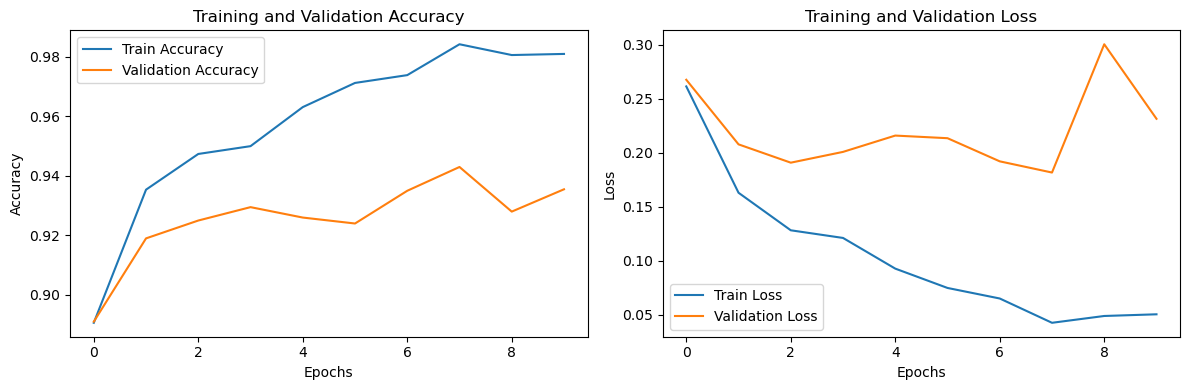

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

# Paths to the dataset
train_dir = "C:/Users/server4/Desktop/train"
test_dir = "C:/Users/server4/Desktop/test"

# Parameters
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32
epochs = 10

# Load preprocessed data
def load_preprocessed_data(directory):
    datagen = ImageDataGenerator()  # No additional preprocessing
    generator = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * batch_size >= generator.samples:
            break
    return np.vstack(images), np.hstack(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_preprocessed_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_preprocessed_data(test_dir)

# Normalize the data (scaling pixel values between 0 and 1)
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Build the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
base_model.trainable = False

# Build the classifier model on top of InceptionV3
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the InceptionV3 model
print("Training InceptionV3 model...")
history = model.fit(X_train_scaled, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_data=(X_test_scaled, y_test_encoded))

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Convert predictions to binary values
y_train_pred_binary = (y_train_pred > 0.5).astype(int)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Metrics
train_accuracy = accuracy_score(y_train_encoded, y_train_pred_binary)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred_binary)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report:")
class_names = ['Class 0', 'Class 1']  # Replace with actual class names
print(classification_report(y_test_encoded, y_test_pred_binary, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_test_pred_binary)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

plot_confusion_matrix(cm, classes=class_names)
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
# Save only the weights
model.save_weights('inceptionv3_weights.weights.h5')




In [1]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models

# Rebuild the same model architecture
base_model = InceptionV3(weights=None, include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Set it to False if you don't want to fine-tune

# Define the rest of the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Load the weights into the model
model.load_weights('inceptionv3_weights.weights.h5')

# Now the model is ready for evaluation or further training



In [ ]:
pip install gradio tensorflow scikit-learn pillow numpy
